기술 통계

- 결측치
- Tabular descriptive statistics
- 참고)Graphical descriptive statistics#1/2

In [187]:
#
import pandas as pd

In [188]:
#
인사평가 = pd.DataFrame(
    {'상반기' : [10, None, 50, 100],
    '하반기': [60, 80, 40, 100]})
인사평가

상반기  하반기
0   10.0   60
1    NaN   80
2   50.0   40
3  100.0  100

# 결측치

### isna()

isnull()로도 사용됨

In [189]:
인사평가.isna()

상반기    하반기
0  False  False
1   True  False
2  False  False
3  False  False

In [191]:
인사평가.isna().sum()

상반기    1
하반기    0
dtype: int64

In [192]:
인사평가.isna().sum().sum()

1

- any

In [14]:
인사평가.isna().any()

상반기     True
하반기    False
dtype: bool

In [13]:
# help(인사평가.isna().any())
# |      DataFrame.any : Return whether any element is True over requested axis.


In [17]:
인사평가.isna().shape

(4, 2)

나는 컬럼별로 어떤 컬럼이 결측치를 가지는 지 알고 싶어  
-> 그러면 컬럼은 살아 있어야겠다  
-> 그러면 현재 컬럼은 2개니깐 데이터의 shape은 (?, 2) 이렇게 되어야 겠네  
-> 아 그러면 변화하는 차원은 0번째니깐 axis=0으로 넣자  

In [18]:
인사평가.isna().any(axis=0)

상반기     True
하반기    False
dtype: bool

In [19]:
인사평가.isna().any(axis=0).shape

(2,)

(4, 2)-> (2,)   
아하 4가 변했네  
4는 0번째니깐 axis=0으로 하는게 맞네!  

## Datasets 01

In [22]:
df = pd.read_csv('../Datasets/Dataset_01.csv')
df

TV      Radio  Social_Media Influencer       Sales
0     16.0   6.566231      2.907983       Mega   54.732757
1     13.0   9.237765      2.409567       Mega   46.677897
2     41.0  15.886446      2.913410       Mega  150.177829
3     83.0  30.020028      6.922304       Mega  298.246340
4     15.0   8.437408      1.405998      Micro   56.594181
...    ...        ...           ...        ...         ...
4567  26.0   4.472360      0.717090      Micro   94.685866
4568  71.0  20.610685      6.545573       Nano  249.101915
4569  44.0  19.800072      5.096192      Micro  163.631457
4570  71.0  17.534640      1.940873      Macro  253.610411
4571  42.0  15.966688      5.046548      Micro  148.202414

[4572 rows x 5 columns]

### Q1. 데이터 세트 내에 총 결측값의 개수는 몇 개인가? (답안 예시) 23

In [23]:
df.isna().sum().sum()

26

In [24]:
# 정답: 26

### fillna()

In [25]:
인사평가.fillna(20)

상반기  하반기
0   10.0   60
1   20.0   80
2   50.0   40
3  100.0  100

In [26]:
인사평가

상반기  하반기
0   10.0   60
1    NaN   80
2   50.0   40
3  100.0  100

### dropna()

- 기본적으로 결측이 하나라도 있으면 row가 삭제됨

In [27]:
인사평가.dropna()

상반기  하반기
0   10.0   60
2   50.0   40
3  100.0  100

In [28]:
인사평가.dropna(axis=0)

상반기  하반기
0   10.0   60
2   50.0   40
3  100.0  100

In [29]:
인사평가.dropna(axis=1)

하반기
0   60
1   80
2   40
3  100

# Tabular descriptive statistics

## 도수분포표

frequency table: 데이터를 구간으로 나누어, 각 구간의 빈도를 나타낸 표

In [30]:
#
인적사항 = pd.DataFrame({'혈액형':['A', 'A',  'B', 'AB'],'성별':['f','m','m','f',]})
인적사항

혈액형 성별
0   A  f
1   A  m
2   B  m
3  AB  f

In [31]:
인적사항.혈액형.value_counts()

혈액형
A     2
B     1
AB    1
Name: count, dtype: int64

In [32]:
인적사항.혈액형.value_counts(normalize=True)*100

혈액형
A     50.0
B     25.0
AB    25.0
Name: proportion, dtype: float64

In [33]:
인적사항.value_counts()

혈액형  성별
A    f     1
     m     1
AB   f     1
B    m     1
Name: count, dtype: int64

In [34]:
인적사항[['혈액형','성별']].value_counts()

혈액형  성별
A    f     1
     m     1
AB   f     1
B    m     1
Name: count, dtype: int64

## q. DataSet 02 - 1번

In [35]:
df = pd.read_csv('../Datasets/Dataset_02.csv')
df

Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]

In [36]:
df[["Sex","BP","Cholesterol"]].value_counts(normalize=True)

Sex  BP      Cholesterol
F    HIGH    NORMAL         0.105
M    HIGH    NORMAL         0.105
     LOW     NORMAL         0.095
     NORMAL  HIGH           0.095
F    NORMAL  HIGH           0.090
M    HIGH    HIGH           0.090
F    HIGH    HIGH           0.085
M    LOW     HIGH           0.085
F    LOW     HIGH           0.070
             NORMAL         0.070
     NORMAL  NORMAL         0.060
M    NORMAL  NORMAL         0.050
Name: proportion, dtype: float64

In [37]:
# 정답: 0.105

## 교차분석표, 교차표
Cross tables, contingency(우연성) tables

### pd.crosstab()

In [38]:
#
df=pd.read_csv('../Datasets/Patients.csv')
df

환자번호 당뇨 여부 비만 여부
0      1     Y     N
1      2     N     Y
2      3     N     N
3      4     N     N
4      5     N     Y
..   ...   ...   ...
95    96     N     N
96    97     N     N
97    98     Y     N
98    99     N     N
99   100     N     N

[100 rows x 3 columns]

In [39]:
pd.crosstab(df['당뇨 여부'], df['비만 여부'])

비만 여부   N   Y
당뇨 여부        
N      62  22
Y      12   4

- 전체 대비 해당 빈도 비율
    - Normalize by dividing all values by the sum of values.


In [40]:
pd.crosstab(index=df['당뇨 여부'], columns=df['비만 여부'], normalize=True)

비만 여부     N     Y
당뇨 여부            
N      0.62  0.22
Y      0.12  0.04

## DataSet 02 - 1번

q. crosstab을 이용해서 풀어보아라

In [41]:
df = pd.read_csv('../Datasets/Dataset_02.csv')
df

Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]

In [42]:
pd.crosstab([df.Sex, df.BP], df.Cholesterol, normalize=True)

Cholesterol   HIGH  NORMAL
Sex BP                    
F   HIGH     0.085   0.105
    LOW      0.070   0.070
    NORMAL   0.090   0.060
M   HIGH     0.090   0.105
    LOW      0.085   0.095
    NORMAL   0.095   0.050

- 전체 대비 해당 빈도 비율 + margin

In [43]:
df=pd.read_csv('../Datasets/Patients.csv')
df.head()

환자번호 당뇨 여부 비만 여부
0     1     Y     N
1     2     N     Y
2     3     N     N
3     4     N     N
4     5     N     Y

In [44]:
pd.crosstab(df['당뇨 여부'], df['비만 여부'], normalize=True, margins=True)

비만 여부     N     Y   All
당뇨 여부                  
N      0.62  0.22  0.84
Y      0.12  0.04  0.16
All    0.74  0.26  1.00

- row 기준 해당 빈도 비율 + margin
    - If passed 'index' will normalize over each row.

In [45]:
pd.crosstab(df['당뇨 여부'], df['비만 여부'], normalize='index', margins=True)

비만 여부         N         Y
당뇨 여부                    
N      0.738095  0.261905
Y      0.750000  0.250000
All    0.740000  0.260000

In [46]:
pd.crosstab(df['당뇨 여부'], df['비만 여부'], normalize=0, margins=True)

비만 여부         N         Y
당뇨 여부                    
N      0.738095  0.261905
Y      0.750000  0.250000
All    0.740000  0.260000

당뇨 여부 N이 100%일 때(당뇨 여부가 N일때) 비만 여부의 비율을 구할 수 있다.   
당뇨 여부 Y가 100%일 때 비만 여부의 비율을 구할 수 있다. 

- column 기준 해당 빈도 비율 + margin

In [47]:
pd.crosstab(df['당뇨 여부'], df['비만 여부'], normalize=1, margins=True)
# pd.crosstab(df['당뇨 여부'], df['비만 여부'], normalize='columns', margins=True)

비만 여부         N         Y   All
당뇨 여부                          
N      0.837838  0.846154  0.84
Y      0.162162  0.153846  0.16

비만 여부 N이 100%일 때 당뇨 여부의 비율을 구할 수 있다.   
비만 여부 Y가 100%일 때 당뇨 여부의 비율을 구할 수 있다. 

# 참고)Graphical descriptive statistics#1/2

변수 유형(Categorical Variable, Numerical Variables)에 따라  기술 통계 방법이 달라짐  
- Categorical Variable
    - 히스토그램, 막대그래프, 파이차트 등
- Numerical Variables
    - 선 그래프, 산점도, 줄기 잎 그림 등

 > 시험에서 코드를 입력할 필요는 없지만 그림을 보고 해석은 할 수 있어야 한다

Pandas는 `plot`이라는 시각화 메서드(함수)를 내장. 

`plot`은 matplotlib(시각화 전문 패키지)를 내부에서 임포트됨

In [48]:
#
타이타닉=pd.read_csv('../Datasets/titanic_train.csv')
타이타닉.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## 히스토그램 & 분포

- histogram: 도수분포표를 그래프로 그린 것
- `자료의 분포` 알 수 있음
- 연속 변수→ 계급값 나누기 → 도수분포표 → 히스토그램

### plot.hist()

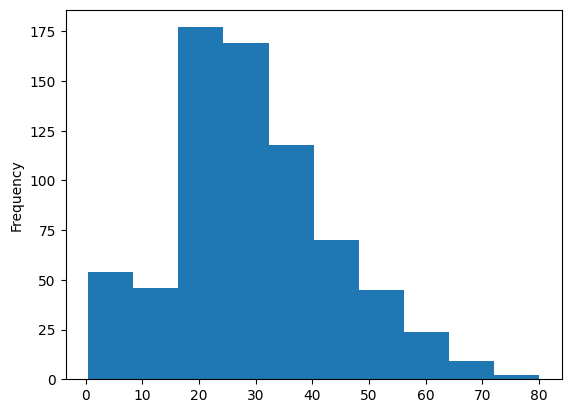

In [49]:
타이타닉.Age.plot.hist();
#타이타닉.Age.plot(kind='hist')

- 계급값 개수 정하기

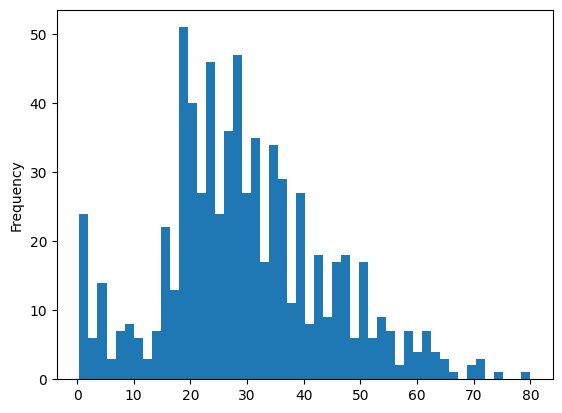

In [50]:
타이타닉.Age.plot.hist(bins=50);

### plot.density()

- 확률 밀도 함수(PDF, Probability Density Function)
    - 연속확률변수의 분포를 나타내는 연속확률분포에서 특정 구간의 확률을 나타내기 위한 함수.

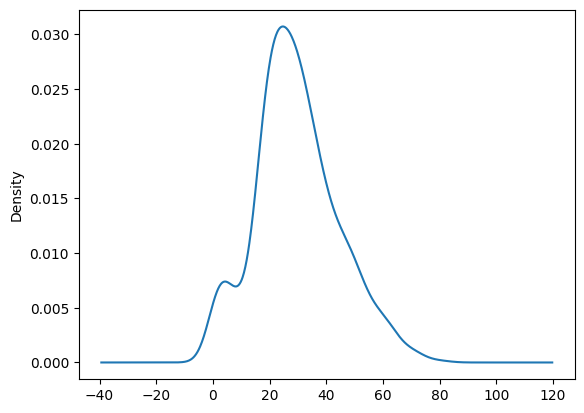

In [51]:
타이타닉.Age.plot.density();

## 막대그래프

### plot.bar()

In [52]:
타이타닉.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [53]:
타이타닉_성별 = 타이타닉.Sex.value_counts()
타이타닉_성별

Sex
male      577
female    314
Name: count, dtype: int64

In [54]:
type(타이타닉_성별)

pandas.core.series.Series

<Axes: xlabel='Sex'>

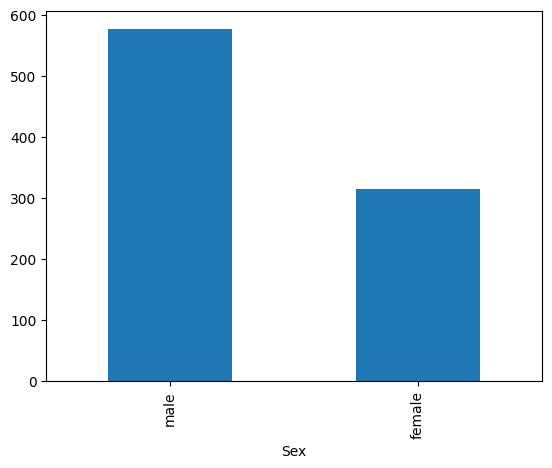

In [55]:
타이타닉_성별.plot.bar()

Series 객체의 색인은 그래프를 생성할 때 X축으로 해석

### plot.barh()

<Axes: ylabel='Sex'>

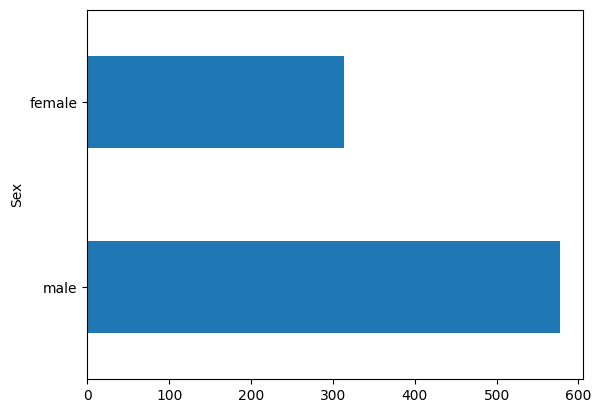

In [56]:
타이타닉_성별.plot.barh()

- 남녀별 생존률 구하기
    - 각 성별을 100%로 구하기

In [57]:
타이타닉_생존=pd.crosstab(타이타닉.Sex, 타이타닉.Survived, normalize='index')
타이타닉_생존

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908

<Axes: ylabel='Sex'>

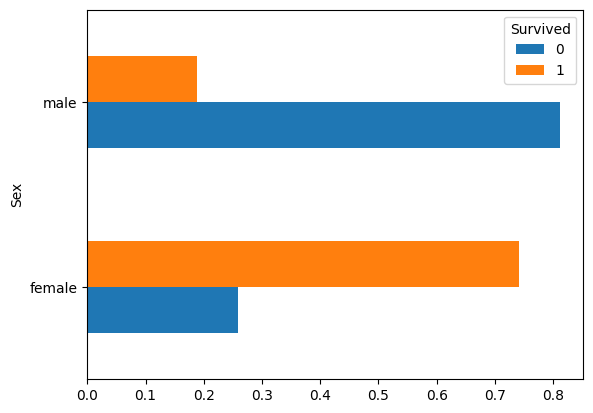

In [58]:
타이타닉_생존.plot.barh()

<Axes: ylabel='Sex'>

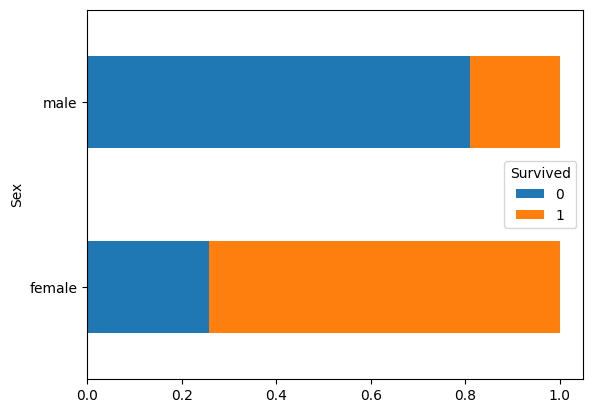

In [59]:
타이타닉_생존.plot.barh(stacked=True)

> 이 그림 자주 등장 q. 전체 male중 survived된 비율은?소수점 둘째자리까지만 기입(답안 예시: 0.21)

In [60]:
pd.crosstab(타이타닉.Sex, 타이타닉.Survived, normalize='index')

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908

q. 크로스탭을 사용하지 않고 len을 이용해서 구하여라

In [61]:
len(타이타닉.loc[타이타닉.Sex=='male'])

577

In [62]:
타이타닉.Survived.unique()

array([0, 1], dtype=int64)

In [63]:
len(타이타닉.loc[(타이타닉.Sex=='male')&(타이타닉.Survived==1)])

109

In [64]:
len(타이타닉.loc[(타이타닉.Sex=='male')&(타이타닉.Survived==1)])/len(타이타닉.loc[타이타닉.Sex=='male'])

0.18890814558058924

## 파이 차트

### plot.pie()

In [65]:
타이타닉_승선항=타이타닉.Embarked.value_counts()
타이타닉_승선항

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: ylabel='count'>

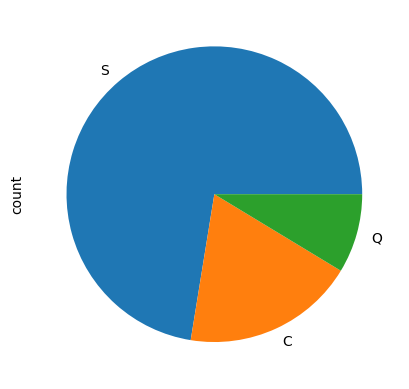

In [66]:
타이타닉_승선항.plot.pie()

<Axes: ylabel='count'>

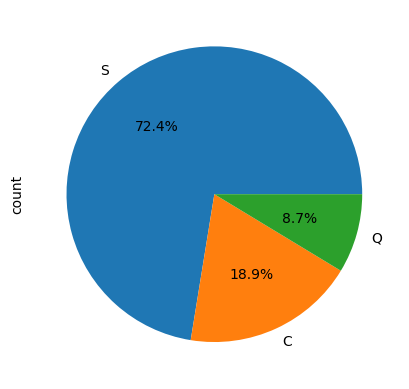

In [67]:
타이타닉_승선항.plot.pie(autopct='%.1f%%')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html
# 아래쪽 example 참고

## 선 그래프

- 시간에 따른 자료의 변화나 추세를 파악하는데 적절
- 가로축은 보통 `시간`

### plot.line()

In [68]:
#
df = pd.DataFrame({
   'pig': [20, 18, 489, 675, 1776],
   'horse': [4, 25, 281, 600, 1900]
   }, index=[1990, 1997, 2003, 2009, 2014])
df

pig  horse
1990    20      4
1997    18     25
2003   489    281
2009   675    600
2014  1776   1900

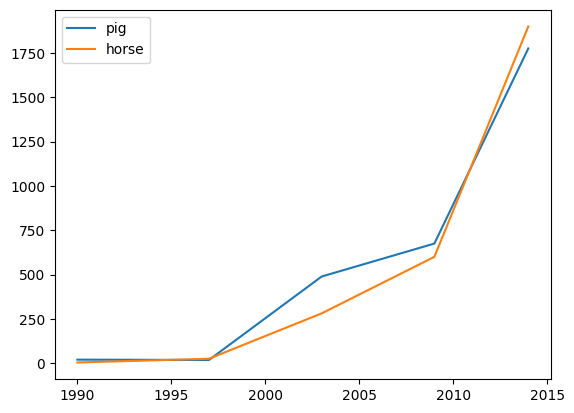

In [69]:
df.plot.line();

## 산점도

산포도, 스캐터 플랏

x,y 두 변수의 흩어진 정도를 시각화

### plot.scatter()

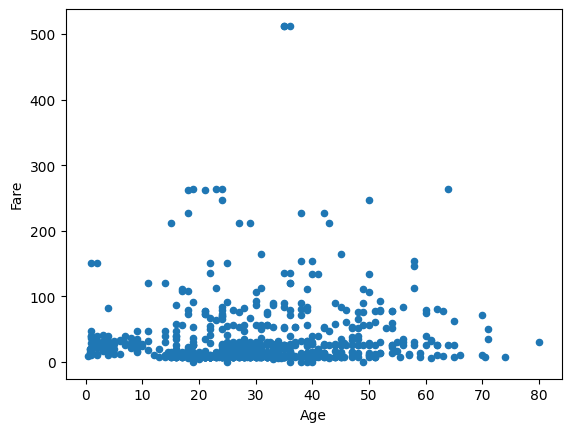

In [70]:
타이타닉.plot.scatter(x='Age',y='Fare');

Q. 비싼 티켓(400이상)을 사신 분은 구조(생존)되셨을까?

In [71]:
타이타닉[타이타닉.Fare>500]

PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C

In [72]:
타이타닉.loc[타이타닉.Fare>500, 'Survived']

258    1
679    1
737    1
Name: Survived, dtype: int64

> ㅠ 돈을 많이 벌어야 하네요

- 생존여부 스캐터 플랏에 표시

In [73]:
# adding 'color' column
타이타닉['color']=타이타닉.Survived.map(lambda x: 'green' if x==0 else 'blue')

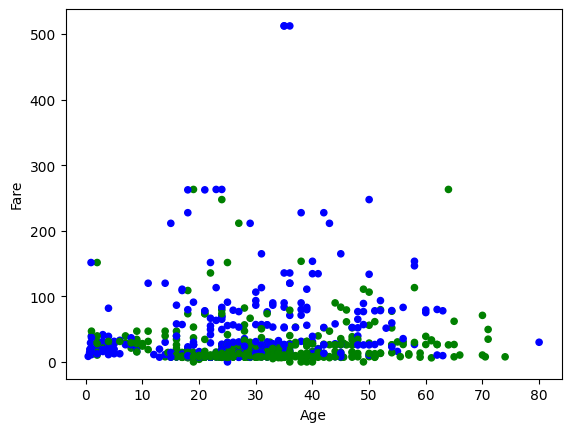

In [75]:
타이타닉.plot.scatter(x='Age',y='Fare', c='color');